In [7]:
from qm_shors_algorithm import *
from shor_helpers import *
import Circuits as circ
import numpy as np
from MPSU import *
import matplotlib.pyplot as plt
import Gates as gts
import copy


In [8]:


mpsfat , len_a, tim1 = get_shor_fat(15,7,2**13)




MPSU created in 0.00020313262939453125
Hadamards applied in 0.0008158683776855469
Control U gates created in 0.0012102127075195312
Control U 0 gate applied in 0.0005540847778320312
SWAP gates applied in 0.0034644603729248047
Control U 1 gate applied in 0.0007262229919433594
SWAP gates applied in 0.0032989978790283203
Control U 2 gate applied in 0.001032114028930664
SWAP gates applied in 0.0029549598693847656
Control U 3 gate applied in 0.0008068084716796875
SWAP gates applied in 0.002824068069458008
Control U 4 gate applied in 0.0004146099090576172
SWAP gates applied in 0.0020904541015625
Control U 5 gate applied in 0.0007951259613037109
SWAP gates applied in 0.001781463623046875
Control U 6 gate applied in 0.0008556842803955078
SWAP gates applied in 0.0014758110046386719
Control U 7 gate applied in 0.0005431175231933594
SWAP gates applied in 0.0009298324584960938
Control U 8 gate applied in 0.0004596710205078125
SWAP gates applied in 0.0005490779876708984
Control U 9 gate applied in 0

(1+0j) total probability


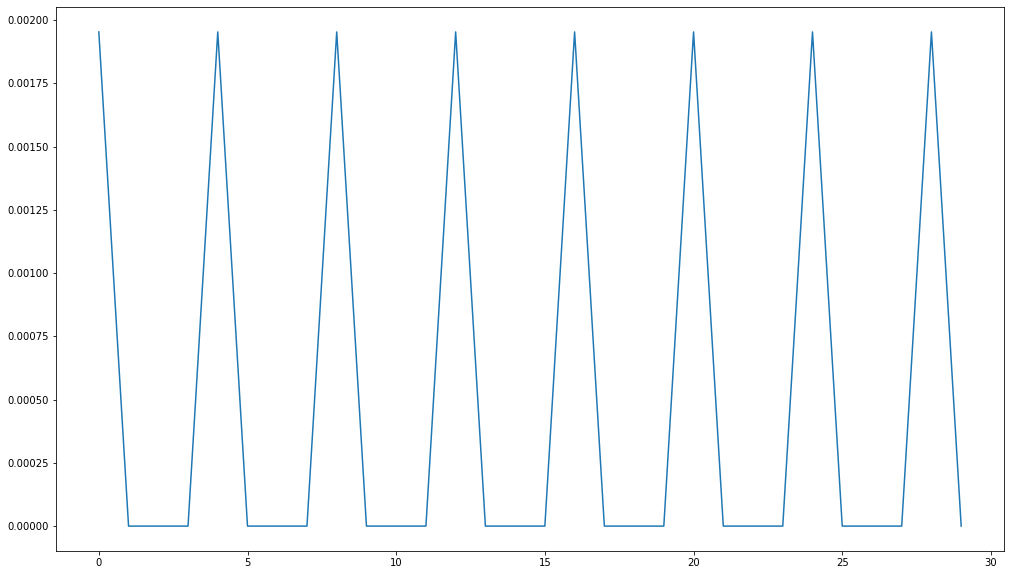

In [9]:
measuredmps = mpsfat.collapse_U()
#measuredmps_2 = copy.deepcopy(measuredmps)
#measuredmps = circ.fourier_transform_MPS(measuredmps,len_a)
#measuredmps_2 = circ.fourier_transform_MPO(measuredmps_2,len_a)
psi = measuredmps.measure_subspace(0,len_a)
#plot psi
plt.figure(figsize=(17,10))
plt.plot(psi[0:30])
plt.show()


In [10]:
'''
measuredmps_2.plot_bond_dims("MPS")
measuredmps.plot_bond_dims("MPO Fourier Transform")
'''

'\nmeasuredmps_2.plot_bond_dims("MPS")\nmeasuredmps.plot_bond_dims("MPO Fourier Transform")\n'

[[1]]


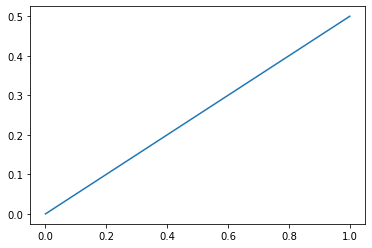

In [11]:
#test measurement generally
mps = MPS.create_MPS_init_to_N(2,2,2**8)
mps.__class__ = MPS 
mps.apply_1_site_gate(gts.H,0)
mps.apply_2_site_gate(gts.CNOT,0)
psi = mps.measure_subspace(0,2)
#plt.plot(psi)
#plt.show()


new = mps.collapse_subspace(1,2,1)
new.__class__ = MPS
psi = new.measure_subspace(0,1)
plt.plot(psi)
plt.show()


N:  15
x:  7
xi_mpo:  8192
xi_mps:  8192
copy 8.392333984375e-05
merge 0.005186557769775391
append 8.106231689453125e-05
copy 0.0006666183471679688
merge 0.01298379898071289
append 9.679794311523438e-05
copy 0.0001480579376220703
merge 0.0037412643432617188
append 8.940696716308594e-05
copy 0.00013947486877441406
merge 0.0035398006439208984
append 8.58306884765625e-05
copy 0.00012803077697753906
merge 0.0034093856811523438
append 8.130073547363281e-05
copy 0.00012302398681640625
merge 0.003269195556640625
append 7.939338684082031e-05
copy 0.0004916191101074219
merge 0.002840757369995117
append 7.724761962890625e-05
copy 0.00011491775512695312
merge 0.003049612045288086
append 5.221366882324219e-05
copy 6.341934204101562e-05
merge 0.002875804901123047
append 7.343292236328125e-05
copy 5.841255187988281e-05
merge 0.002730131149291992
append 6.270408630371094e-05
total 4.863739013671875e-05
MPS initialized in 0.00048732757568359375
MPO applied in 0.004052639007568359
SWAP gates applied in

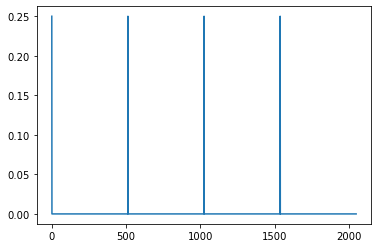

Fourier transform 0.07364463806152344
Sampling 5.787047863006592
p_success_mpo:  0.5017


In [17]:
N = 15
x = 7
xi_mpo = 2**13
xi_mps = 2**13
print("N: ",N)
print("x: ",x)
print("xi_mpo: ",xi_mpo)
print("xi_mps: ",xi_mps)
n_samples = 10**4
len_a = 2*int(np.ceil(np.log2(N)))+3


cx_mpos, tim_create_mpos  = gts.cx_pow_2k_mod_N_mpo_mpo(N,x,len_a,xi_mpo)


xi_max_in_mpos = [mpo.maximum_bond_dim() for mpo in cx_mpos]
xi_max_in_mpos_zip_up = [mpo.largest_xi_during_zip_up for mpo in cx_mpos]


mps , len_a, tim_before_fourier = get_shor_mpo(N,x,xi_mps,cx_mpos)
xi_max_in_mps = mps.maximum_bond_dim()

tim_after_fourier = tim.Tim()
new = mps.collapse_subspace(len_a,mps.L,1)
tim_after_fourier.print_since_last("Collapse subspace")

new = circ.fourier_transform_MPS(new,len_a,inv=True)

psi = new.measure_subspace(0,len_a)
plt.plot(psi)
plt.show()


tim_after_fourier.print_since_last("Fourier transform")

samples =  new.sample_range(0,len_a,n_samples)

tim_after_fourier.print_since_last("Sampling")

p_success_mpo = sh.success_prob_measurement_samples(samples,x,N,invert=False)
print("p_success_mpo: ",p_success_mpo)